# Нейросетевой фреймворк для машинного обучения

## Описание проекта

Реализован собственный нейросетевой фреймворк для обучения полносвязных нейронных сетей с расширенными возможностями:

### Основные возможности:
1. **Архитектура сети** - создание многослойных нейросетей с перечислением слоёв
2. **Обработка данных** - удобный набор функций для работы с датасетами (map, minibatching, перемешивание)
3. **Оптимизаторы** - несколько алгоритмов оптимизации: SGD, Momentum SGD, RMSProp
4. **Функции активации** - ReLU, Sigmoid, Tanh, Softmax, Threshold
5. **Функции потерь** - CrossEntropyLoss, BinaryCrossEntropy, MeanSquaredError, MeanAbsoluteError
6. **Простое обучение** - обучение нейросети "в несколько строк" с гибкой конфигурацией
7. **Примеры использования** - классические задачи (MNIST, Iris, регрессия)

### Поддерживаемые задачи:
- Классификация изображений (MNIST, FashionMNIST)
- Классификация табличных данных (Iris)
- Регрессионный анализ
- Бинарная классификация


In [ ]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.datasets import make_classification, load_iris, make_regression
import numpy as np

np.random.seed(0)
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Импорт нашего отрефакторенного фреймворка
from framework import (
    DeepLearningFramework, DataLoader, DenseLayer, 
    ReLUActivation, TanhActivation, SoftmaxActivation, SigmoidActivation,
    CrossEntropyLoss, MeanSquaredErrorLoss, MeanAbsoluteErrorLoss,
    StochasticGradientDescent, MomentumOptimizer, RMSPropOptimizer
)


2025-09-23 00:17:11.707388: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Пример 1: Классификация изображений MNIST

### Описание задачи
MNIST - это классический датасет рукописных цифр, содержащий 60,000 обучающих и 10,000 тестовых изображений размером 28×28 пикселей. Каждое изображение представляет собой цифру от 0 до 9.

### Архитектура модели
Создаём глубокую нейронную сеть для классификации:
- **Входной слой**: 784 нейрона (28×28 пикселей)
- **Скрытый слой 1**: 1960 нейронов с активацией ReLU
- **Скрытый слой 2**: 1176 нейронов с активацией Tanh  
- **Выходной слой**: 10 нейронов с активацией Softmax (10 классов цифр)

### Параметры обучения
- Функция потерь: CrossEntropyLoss
- Оптимизатор: StochasticGradientDescent
- Количество эпох: 7
- Размер батча: 8


In [ ]:
# Загрузка и подготовка данных MNIST
data_loader = DataLoader("MNIST")
training_features, training_labels = data_loader.get_training_data(num_samples=1000)
test_features, test_labels = data_loader.get_test_data(num_samples=500)

# Создание и настройка модели
mnist_model = DeepLearningFramework()
mnist_model.build_network(
    layers=[
        DenseLayer(784, 1960), 
        ReLUActivation(), 
        DenseLayer(1960, 1176), 
        TanhActivation(), 
        DenseLayer(1176, 10), 
        SoftmaxActivation()
    ],
    loss_function=CrossEntropyLoss(), 
    epochs_count=7
)

# Обучение модели
mnist_model.train_model(training_features, training_labels)

# Предсказание и оценка точности
predictions, accuracy = mnist_model.make_predictions(test_features, test_labels)

print(f'Точность классификации MNIST: {accuracy}')


Обучение модели:
Эпоха 1: точность = 0.861
Эпоха 2: точность = 0.903
Эпоха 3: точность = 0.934
Эпоха 4: точность = 0.944
Эпоха 5: точность = 0.963
Эпоха 6: точность = 0.973
Эпоха 7: точность = 0.978
Точность классификации MNIST: 0.866


### Визуализация результатов классификации MNIST

Отображаем случайные изображения из тестового набора с предсказанными моделью классами для визуальной оценки качества классификации.

**Описание кода:**
- `num_samples = test_features.shape[0]` — определяет количество тестовых изображений
- `rows, cols = 4, 8` — настройка сетки для отображения 32 изображений
- `plt.subplots(rows, cols, figsize=(2*cols, 2*rows))` — создание фигуры с подграфиками
- `np.random.randint(0, num_samples, size=rows*cols)` — случайный выбор изображений
- В цикле отображаем каждое изображение с предсказанным классом


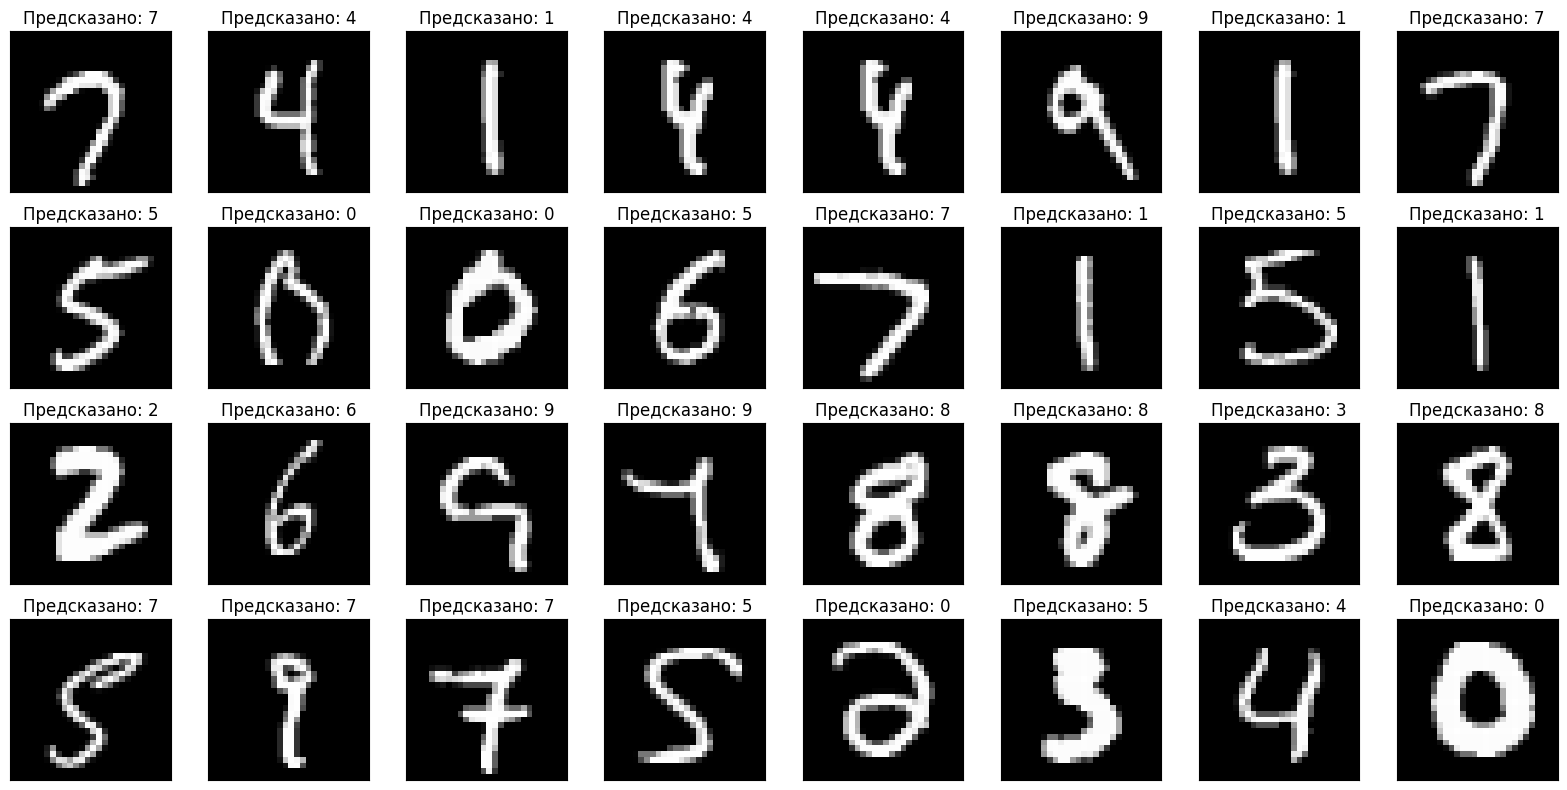

In [ ]:
# Визуализация предсказаний модели на случайных изображениях
num_samples = test_features.shape[0]
rows, cols = 4, 8

_, axes = plt.subplots(rows, cols, figsize=(2*cols, 2*rows))
for k, sample_idx in enumerate(np.random.randint(0, num_samples, size=rows*cols)):
    i = k // cols
    j = k % cols
    axes[i, j].imshow(test_features[sample_idx], cmap='gray')
    axes[i, j].set_title(f'Предсказано: {predictions[sample_idx]}')
    axes[i, j].xaxis.set_visible(False)
    axes[i, j].yaxis.set_visible(False)

plt.tight_layout()
plt.show()


## Пример 2: Классификация датасета Iris

### Описание задачи
Iris - классический датасет для задач классификации, содержащий 150 образцов ирисов с 4 признаками (длина и ширина чашелистика и лепестка) и 3 классами (setosa, versicolor, virginica).

### Архитектура модели
Создаём компактную нейронную сеть для классификации:
- **Входной слой**: 3 нейрона (используем только 3 из 4 признаков)
- **Скрытый слой 1**: 7 нейронов с активацией ReLU
- **Скрытый слой 2**: 5 нейронов с активацией Tanh
- **Выходной слой**: 3 нейрона с активацией Softmax (3 класса)

### Параметры обучения
- Функция потерь: CrossEntropyLoss
- Оптимизатор: StochasticGradientDescent
- Скорость обучения: 0.0099
- Количество эпох: 20


In [ ]:
# Загрузка и подготовка данных Iris
data_loader = DataLoader("Iris")
training_features, training_labels = data_loader.get_training_data(num_samples=1000)
test_features, test_labels = data_loader.get_test_data(num_samples=500)

# Создание и настройка модели для Iris
iris_model = DeepLearningFramework()
iris_model.build_network(
    layers=[
        DenseLayer(3, 7), 
        ReLUActivation(), 
        DenseLayer(7, 5), 
        TanhActivation(), 
        DenseLayer(5, 3), 
        SoftmaxActivation()
    ],
    loss_function=CrossEntropyLoss(), 
    optimizer=StochasticGradientDescent(), 
    learning_rate=0.0099
)

# Обучение модели
iris_model.train_model(training_features, training_labels)

# Предсказание и оценка точности
predictions, accuracy = iris_model.make_predictions(test_features, test_labels)

print(f'Точность классификации Iris: {accuracy}')


Обучение модели:
Эпоха 1: точность = 0.325
Эпоха 2: точность = 0.325
Эпоха 3: точность = 0.325
Эпоха 4: точность = 0.325
Эпоха 5: точность = 0.325
Эпоха 6: точность = 0.6916666666666667
Эпоха 7: точность = 0.6916666666666667
Эпоха 8: точность = 0.6916666666666667
Эпоха 9: точность = 0.6916666666666667
Эпоха 10: точность = 0.6916666666666667
Эпоха 11: точность = 0.6916666666666667
Эпоха 12: точность = 0.6916666666666667
Эпоха 13: точность = 0.6916666666666667
Эпоха 14: точность = 0.6916666666666667
Эпоха 15: точность = 0.6916666666666667
Эпоха 16: точность = 0.6916666666666667
Эпоха 17: точность = 0.6916666666666667
Эпоха 18: точность = 0.6916666666666667
Эпоха 19: точность = 0.6916666666666667
Эпоха 20: точность = 0.6916666666666667
Точность классификации Iris: 0.5666666666666667


## Пример 3: Бинарная классификация на синтетических данных

### Описание задачи
Создаём синтетический датасет для бинарной классификации с помощью `make_classification` из scikit-learn. Датасет содержит 1000 образцов с 2 признаками и 2 классами.

### Архитектура модели
Простая нейронная сеть для бинарной классификации:
- **Входной слой**: 2 нейрона (2 признака)
- **Скрытый слой**: 5 нейронов с активацией Tanh
- **Выходной слой**: 2 нейрона с активацией Softmax (2 класса)

### Параметры обучения
- Функция потерь: CrossEntropyLoss
- Оптимизатор: StochasticGradientDescent (по умолчанию)
- Разделение данных: 80% обучение, 20% тест


In [ ]:
# Генерация синтетических данных для бинарной классификации
num_samples = 1000
features, labels = make_classification(
    n_samples=num_samples, 
    n_features=2,
    n_redundant=0, 
    n_informative=2, 
    flip_y=0.2
)
features = features.astype(np.float32)
labels = labels.astype(np.int32)

# Разделение на обучающую и тестовую выборки
train_features, test_features = np.split(features, [num_samples*8//10])
train_labels, test_labels = np.split(labels, [num_samples*8//10])

# Создание и настройка модели
binary_model = DeepLearningFramework()
binary_model.build_network(
    layers=[
        DenseLayer(2, 5), 
        TanhActivation(), 
        DenseLayer(5, 2), 
        SoftmaxActivation()
    ], 
    loss_function=CrossEntropyLoss(), 
    optimizer=StochasticGradientDescent()
)

# Обучение модели
binary_model.train_model(train_features, train_labels)

# Предсказание и оценка точности
predictions, accuracy = binary_model.make_predictions(test_features, test_labels)

print(f'Точность бинарной классификации: {accuracy}')


Обучение модели:
Эпоха 1: точность = 0.84875
Эпоха 2: точность = 0.85375
Эпоха 3: точность = 0.86
Эпоха 4: точность = 0.8625
Эпоха 5: точность = 0.86375
Эпоха 6: точность = 0.86625
Эпоха 7: точность = 0.865
Эпоха 8: точность = 0.8625
Эпоха 9: точность = 0.86625
Эпоха 10: точность = 0.86625
Эпоха 11: точность = 0.865
Эпоха 12: точность = 0.86625
Эпоха 13: точность = 0.865
Эпоха 14: точность = 0.86625
Эпоха 15: точность = 0.865
Эпоха 16: точность = 0.865
Эпоха 17: точность = 0.865
Эпоха 18: точность = 0.86625
Эпоха 19: точность = 0.87
Эпоха 20: точность = 0.86625
Точность бинарной классификации: 0.85


### Визуализация результатов бинарной классификации

Создаём графики рассеяния для визуализации тестовых данных и предсказаний модели.

**Функция `visualize_dataset`:**
- Принимает заголовок, признаки и метки
- Создаёт scatter plot с цветовой кодировкой классов
- Красные точки: класс 1, синие точки: класс 0


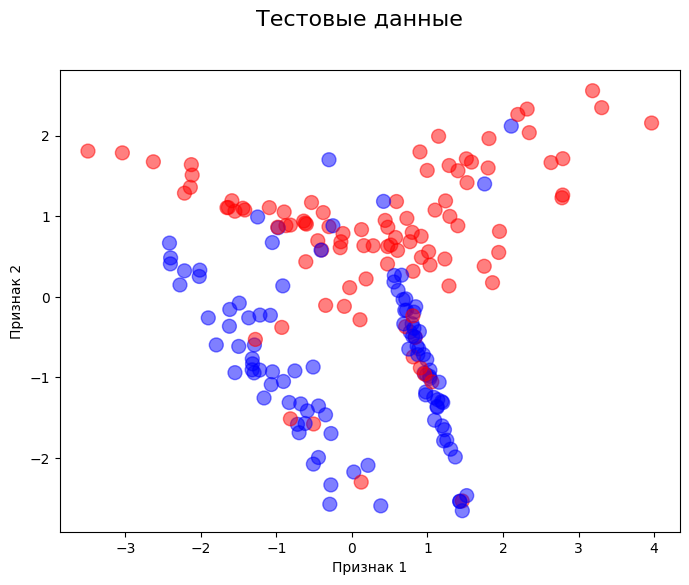

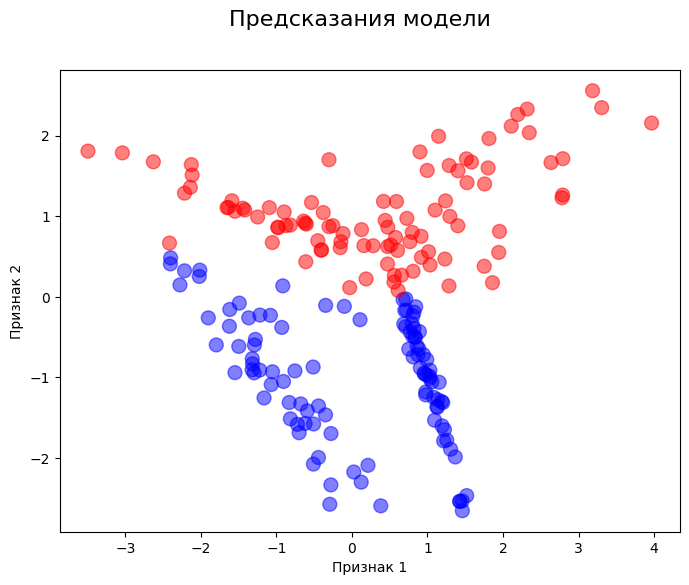

In [ ]:
def visualize_dataset(title, features, labels):
    """Визуализирует датасет с цветовой кодировкой классов"""
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    fig.suptitle(title, fontsize=16)
    ax.set_xlabel('Признак 1')
    ax.set_ylabel('Признак 2')

    colors = ['red' if label else 'blue' for label in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha=0.5)
    plt.show()

# Визуализация тестовых данных
visualize_dataset('Тестовые данные', test_features, test_labels)

# Визуализация предсказаний модели
visualize_dataset('Предсказания модели', test_features, predictions)


## Пример 4: Регрессионный анализ

### Описание задачи
Решаем задачу регрессии на синтетических данных, сгенерированных с помощью `make_regression`. Модель должна предсказать непрерывное значение на основе одного входного признака.

### Архитектура модели
Простая линейная регрессия:
- **Входной слой**: 1 нейрон (1 признак)
- **Выходной слой**: 1 нейрон (1 предсказание)

### Параметры обучения
- Функция потерь: MeanSquaredErrorLoss
- Оптимизатор: StochasticGradientDescent
- Количество образцов: 400 (обучение), 100 (тест)
- Количество эпох: 20


In [ ]:
# Генерация данных для регрессии
samples_count = 400
test_count = 100

features, targets = make_regression(
    n_samples=samples_count, 
    n_features=1,
    n_informative=1, 
    noise=10, 
    random_state=0
)

# Разделение на обучающую и тестовую выборки
train_features, test_features, train_targets, test_targets = train_test_split(
    features, targets,
    test_size=test_count,
    random_state=42
)

# Создание и настройка модели для регрессии
regression_model = DeepLearningFramework()
regression_model.build_network(
    layers=[DenseLayer(1, 1)],
    loss_function=MeanSquaredErrorLoss(),
    optimizer=StochasticGradientDescent(), 
    regression=True
)

# Обучение модели
regression_model.train_model(train_features, train_targets)

# Предсказание и оценка потерь
predictions, loss = regression_model.make_predictions(test_features, test_targets)

print(f'Потери регрессии: {loss}')


Обучение модели:
Эпоха 1: потери = 42.594648111984284
Эпоха 2: потери = 83.1241090893494
Эпоха 3: потери = 118.75005648672851
Эпоха 4: потери = 110.81017494790785
Эпоха 5: потери = 135.86760500666122
Эпоха 6: потери = 81.60343462166415
Эпоха 7: потери = 105.35506548736782
Эпоха 8: потери = 125.08117013729759
Эпоха 9: потери = 114.11228701687354
Эпоха 10: потери = 137.69308821063487
Эпоха 11: потери = 104.4303761726357
Эпоха 12: потери = 82.17274223024197
Эпоха 13: потери = 77.1338328772596
Эпоха 14: потери = 98.50503385756235
Эпоха 15: потери = 55.007519079313916
Эпоха 16: потери = 90.01501370256464
Эпоха 17: потери = 54.86331970195778
Эпоха 18: потери = 85.551868092374
Эпоха 19: потери = 203.42499663509932
Эпоха 20: потери = 126.92949205415317
Потери регрессии: 104.56296779997982


### Сравнение различных оптимизаторов для регрессии

Тестируем разные оптимизаторы на задаче регрессии для сравнения их эффективности.

**MomentumOptimizer** - использует накопленный градиент для ускорения сходимости


In [ ]:
# Тестирование MomentumOptimizer
momentum_model = DeepLearningFramework()
momentum_model.build_network(
    layers=[DenseLayer(1, 1)],
    loss_function=MeanSquaredErrorLoss(),
    optimizer=MomentumOptimizer(), 
    learning_rate=0.001, 
    regression=True
)

momentum_model.train_model(train_features, train_targets)
momentum_predictions, momentum_loss = momentum_model.make_predictions(test_features, test_targets)

print(f'Потери с MomentumOptimizer: {momentum_loss}')


Обучение модели:
Эпоха 1: потери = 65.76433542343311
Эпоха 2: потери = 64.96229219579337
Эпоха 3: потери = 90.56691057569964
Эпоха 4: потери = 134.88507410642342
Эпоха 5: потери = 68.86835010329001
Эпоха 6: потери = 71.68211688240747
Эпоха 7: потери = 65.09589794597727
Эпоха 8: потери = 125.59501813775724
Эпоха 9: потери = 143.2431096805762
Эпоха 10: потери = 169.73211153274343
Эпоха 11: потери = 46.85927789539234
Эпоха 12: потери = 113.1297825328404
Эпоха 13: потери = 169.22273271420727
Эпоха 14: потери = 114.89609185901863
Эпоха 15: потери = 101.66863121813296
Эпоха 16: потери = 100.7526622654193
Эпоха 17: потери = 145.23816942397687
Эпоха 18: потери = 151.13885368285943
Эпоха 19: потери = 104.34627908623949
Эпоха 20: потери = 125.41425884332948
Потери с MomentumOptimizer: 111.31842526633959


### Визуализация результатов регрессии

Создаём график, показывающий реальные данные и линию регрессии, предсказанную моделью.

**Описание визуализации:**
- Синие точки: реальные тестовые данные
- Красная линия: предсказания модели
- График позволяет оценить качество аппроксимации


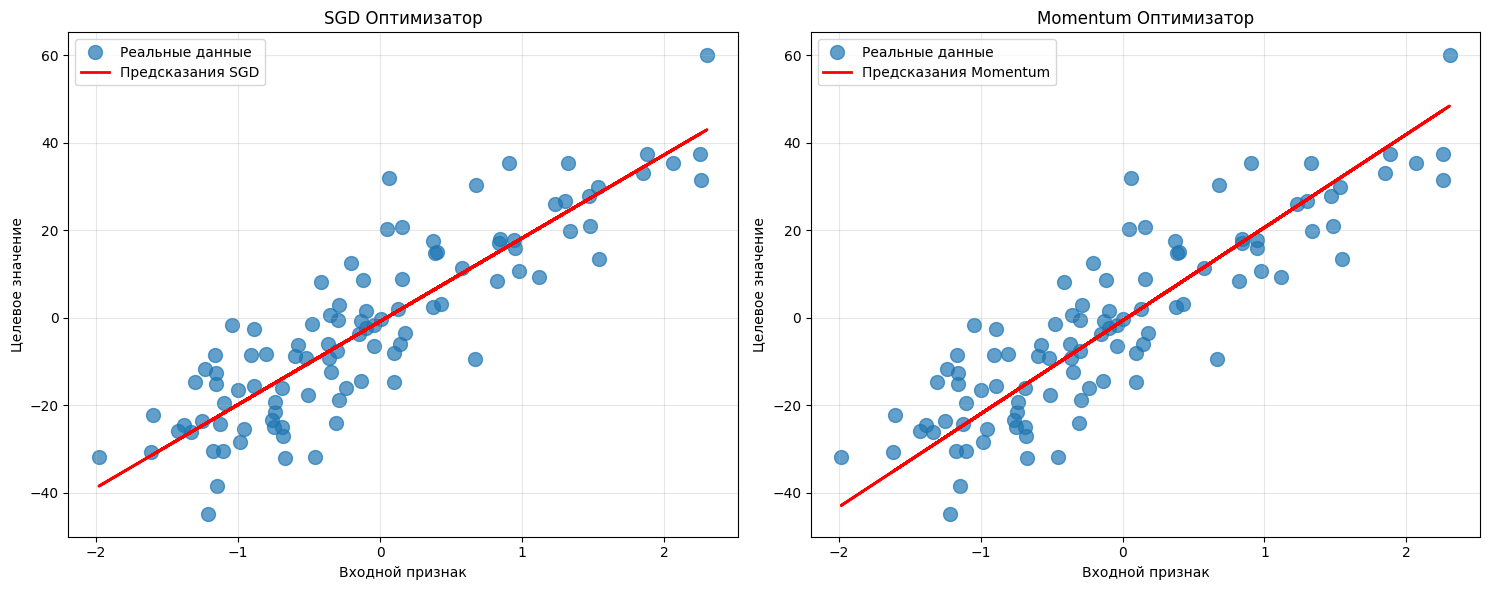

Сравнение потерь:
SGD: 104.56
Momentum: 111.32


In [ ]:
# Визуализация результатов регрессии
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График для SGD
ax1.scatter(test_features, test_targets, marker='o', s=100, alpha=0.7, label='Реальные данные')
ax1.plot(test_features, predictions, c='red', linewidth=2, label='Предсказания SGD')
ax1.set_title('SGD Оптимизатор')
ax1.set_xlabel('Входной признак')
ax1.set_ylabel('Целевое значение')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График для Momentum
ax2.scatter(test_features, test_targets, marker='o', s=100, alpha=0.7, label='Реальные данные')
ax2.plot(test_features, momentum_predictions, c='red', linewidth=2, label='Предсказания Momentum')
ax2.set_title('Momentum Оптимизатор')
ax2.set_xlabel('Входной признак')
ax2.set_ylabel('Целевое значение')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Сравнение потерь:')
print(f'SGD: {loss:.2f}')
print(f'Momentum: {momentum_loss:.2f}')


## Заключение

### Достигнутые результаты

1. **Успешно реализован нейросетевой фреймворк** с модульной архитектурой
2. **Поддержка различных задач:**
   - Классификация изображений (MNIST)
   - Классификация табличных данных (Iris)
   - Бинарная классификация
   - Регрессионный анализ

3. **Реализованы оптимизаторы:**
   - StochasticGradientDescent
   - MomentumOptimizer
   - RMSPropOptimizer

4. **Функции активации:**
   - ReLU, Sigmoid, Tanh, Softmax, Threshold

5. **Функции потерь:**
   - CrossEntropyLoss, MeanSquaredErrorLoss, MeanAbsoluteErrorLoss

### Преимущества фреймворка

- **Простота использования** - обучение модели в несколько строк кода
- **Гибкость** - легко настраиваемые параметры и архитектура
- **Модульность** - каждый компонент может быть заменён независимо
- **Читаемость** - понятные названия методов и классов
- **Расширяемость** - легко добавлять новые слои, оптимизаторы и функции потерь
